# House Sales in King County, USA

Esse dataset contem preços de casas vendidas em King County, Seattle entre Maio de 2014 e Maio de 2015.

## Descrição dos Atributos
<b>id - </b> Identificação da casa <br>
<b>date - </b> Data que a casa foi vendida<br>
<b>price -  </b>Preço alvo de previsão <br>
<b>bedrooms - </b> Quantidade de quartos <br>
<b>bathrooms - </b> Quantidade de banheiros <br>
<b>sqft_living - </b>Metro² da casa  <br>
<b>sqft_lot - </b> Metro² do lote <br>
<b>floors -  </b> Quantidade de andares(niveis) da casa <br>
<b>waterfront - </b> Casa que tem vista para um o mar <br>
<b>view - </b> A casa foi visitada<br>
<b>condition - </b> Quão boa é a condição da casa em geral <br>
<b>grade -  </b>Nota geral dada à unidade habitacional, com base no sistema de classificação do Condado de King <br>
<b>sqft_above -  </b> Metro² da casa, sem contar o porão<br>
<b>sqft_basement -  </b> Metro² do porão<br>
<b>yr_built - </b>Ano de Construção <br>
<b>yr_renovated - </b> Ano que a casa foi renovada<br>
<b>zipcode - </b> CEP <br>
<b>lat - </b> Latitude <br>
<b>long - </b> Longitude  <br>
<b>sqft_living15 - </b> Metro² da casa em  2015(Implica algumas renovações) - Pode ou não ter afetado a área do lote<br>
<b>sqft_lot15 - </b> Tamanho do lote em 2015(Implica algumas renovações) <br>


 <b>Fonte:</b> https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# Import dos modulos
from pandas import read_csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR # Support Vector Regression
from sklearn import cross_validation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')
from scipy import stats
import pickle
%matplotlib inline

## Extraindo e Carregando os Dados

In [2]:
# Carregando o Dataset
dataset = read_csv("kc_house_data.csv")

# Visualizando as Dimensões
print(dataset.shape)

(21613, 21)


## Análise Exploratória de Dados

In [3]:
# Visualizando as primeiras 5 linhas
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Esse dataset possui muitas colunas, ou seja, tem uma alta dimesionalidade e por esse motivo o algoritmo pode apresentar problemas de performance.

In [4]:
# Tipos de dados de cada atributo
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Possui valores nulos
dataset.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Os dados aparentemente não possuem valores nulos e a grande maioria das colunas são numéricas.

In [6]:
# Deletando as colunas ID e DATA pois são irrelevantes para a analise
dataset = dataset.drop(['id', 'date'],axis=1)

In [7]:
# Sumario Estatistico
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Verificando o skew de cada atributo
# Basicamente retorna o quão proximo uma coluna esta de uma distribuição normal, ou gaussiana
# Quanto mais perto do 0 zero mais simétrico
dataset.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

## Visualizações e Gráficos Estatisticos

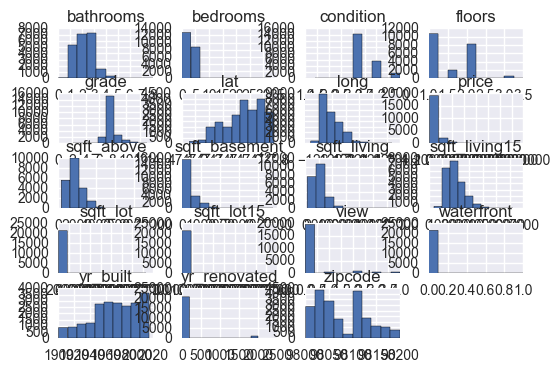

In [9]:
# Histograma
dataset.hist();

Podemos ver que nenhum dos atributos possuem uma distribuição exponencial ou normal.

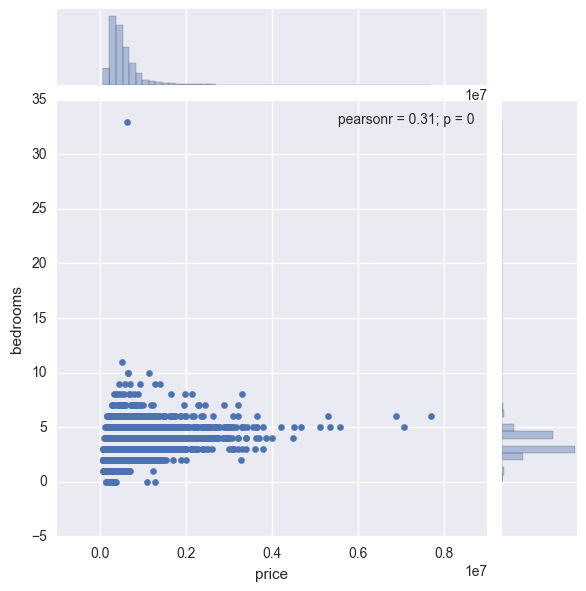

In [10]:
# Scatterplot - Distribuição bivariada
g = sns.jointplot(x = 'price', y = 'bedrooms', data = dataset);

No scatterplot conseguimos visualizar um outlier bastante curioso, alto número de quartos numa casa considerada "barata".

In [11]:
# analisando a linha que contem esses outlier
dataset.loc[dataset['bedrooms'] > 30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [12]:
# Coletamos todas as casas com esse mesmo valor (640.000)
dataset.loc[dataset['price'] == 640000].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,640000.0,4.057692,2.288462,2237.903846,16589.711538,1.663462,0.0,0.153846,3.403846,8.038462,1985.980769,251.923077,1968.500000,38.711538,98095.500000,47.622494,-122.219250,2082.884615,14976.269231
std,0.0,4.174683,0.611140,652.306203,42111.159523,0.566388,0.0,0.638153,0.634301,0.862316,648.753873,391.903542,32.966115,279.152874,52.003582,0.088205,0.138866,553.967283,36029.447548
min,640000.0,2.000000,1.000000,1070.000000,958.000000,1.000000,0.0,0.000000,3.000000,6.000000,880.000000,0.000000,1903.000000,0.000000,98004.000000,47.296400,-122.396000,910.000000,958.000000
25%,640000.0,3.000000,1.937500,1687.500000,4729.250000,1.000000,0.0,0.000000,3.000000,7.000000,1527.500000,0.000000,1947.000000,0.000000,98070.250000,47.598325,-122.331000,1672.500000,4750.500000
50%,640000.0,3.500000,2.500000,2235.000000,6919.500000,2.000000,0.0,0.000000,3.000000,8.000000,1970.000000,0.000000,1974.000000,0.000000,98103.000000,47.634450,-122.285500,2005.000000,6876.000000
75%,640000.0,4.000000,2.500000,2515.000000,10008.500000,2.000000,0.0,0.000000,4.000000,9.000000,2375.000000,452.500000,1998.000000,0.000000,98117.500000,47.679025,-122.101250,2550.000000,10017.000000
max,640000.0,33.000000,3.500000,4090.000000,228690.000000,3.000000,0.0,3.000000,5.000000,10.000000,3670.000000,1300.000000,2013.000000,2013.000000,98199.000000,47.771300,-121.886000,3170.000000,228690.000000


Podemos ver que a média de quartos é 4, ou seja, provavelmente o "33" foi erro de digitação.

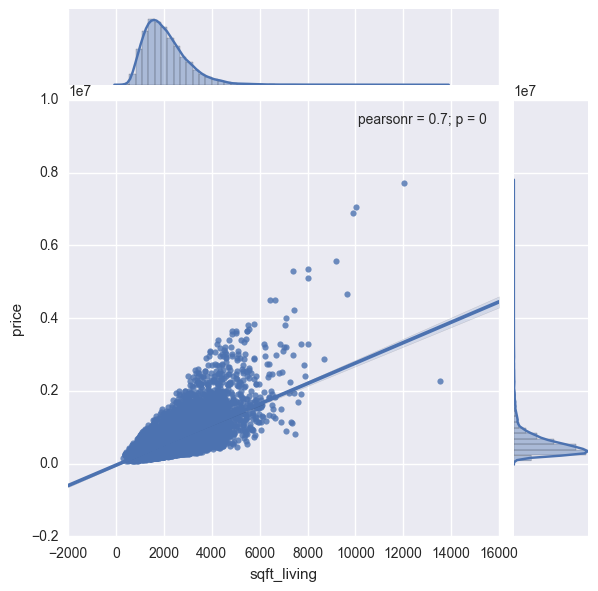

In [13]:
# Scatterplot com linha de regressão
# Metro² da Casa pelo preço
g = sns.jointplot(x = 'sqft_living', y = 'price', data = dataset, kind = 'reg');

No gráfico acima dá pra perceber que conforme maior a casa, mais caro ela é.<br>
Existe uma concentração de imoveis na faixa de 1000 a 6000 metros².<br>

É possível observar um outro outlier, com sqft_living em torno de 13000 a um preço razoável.

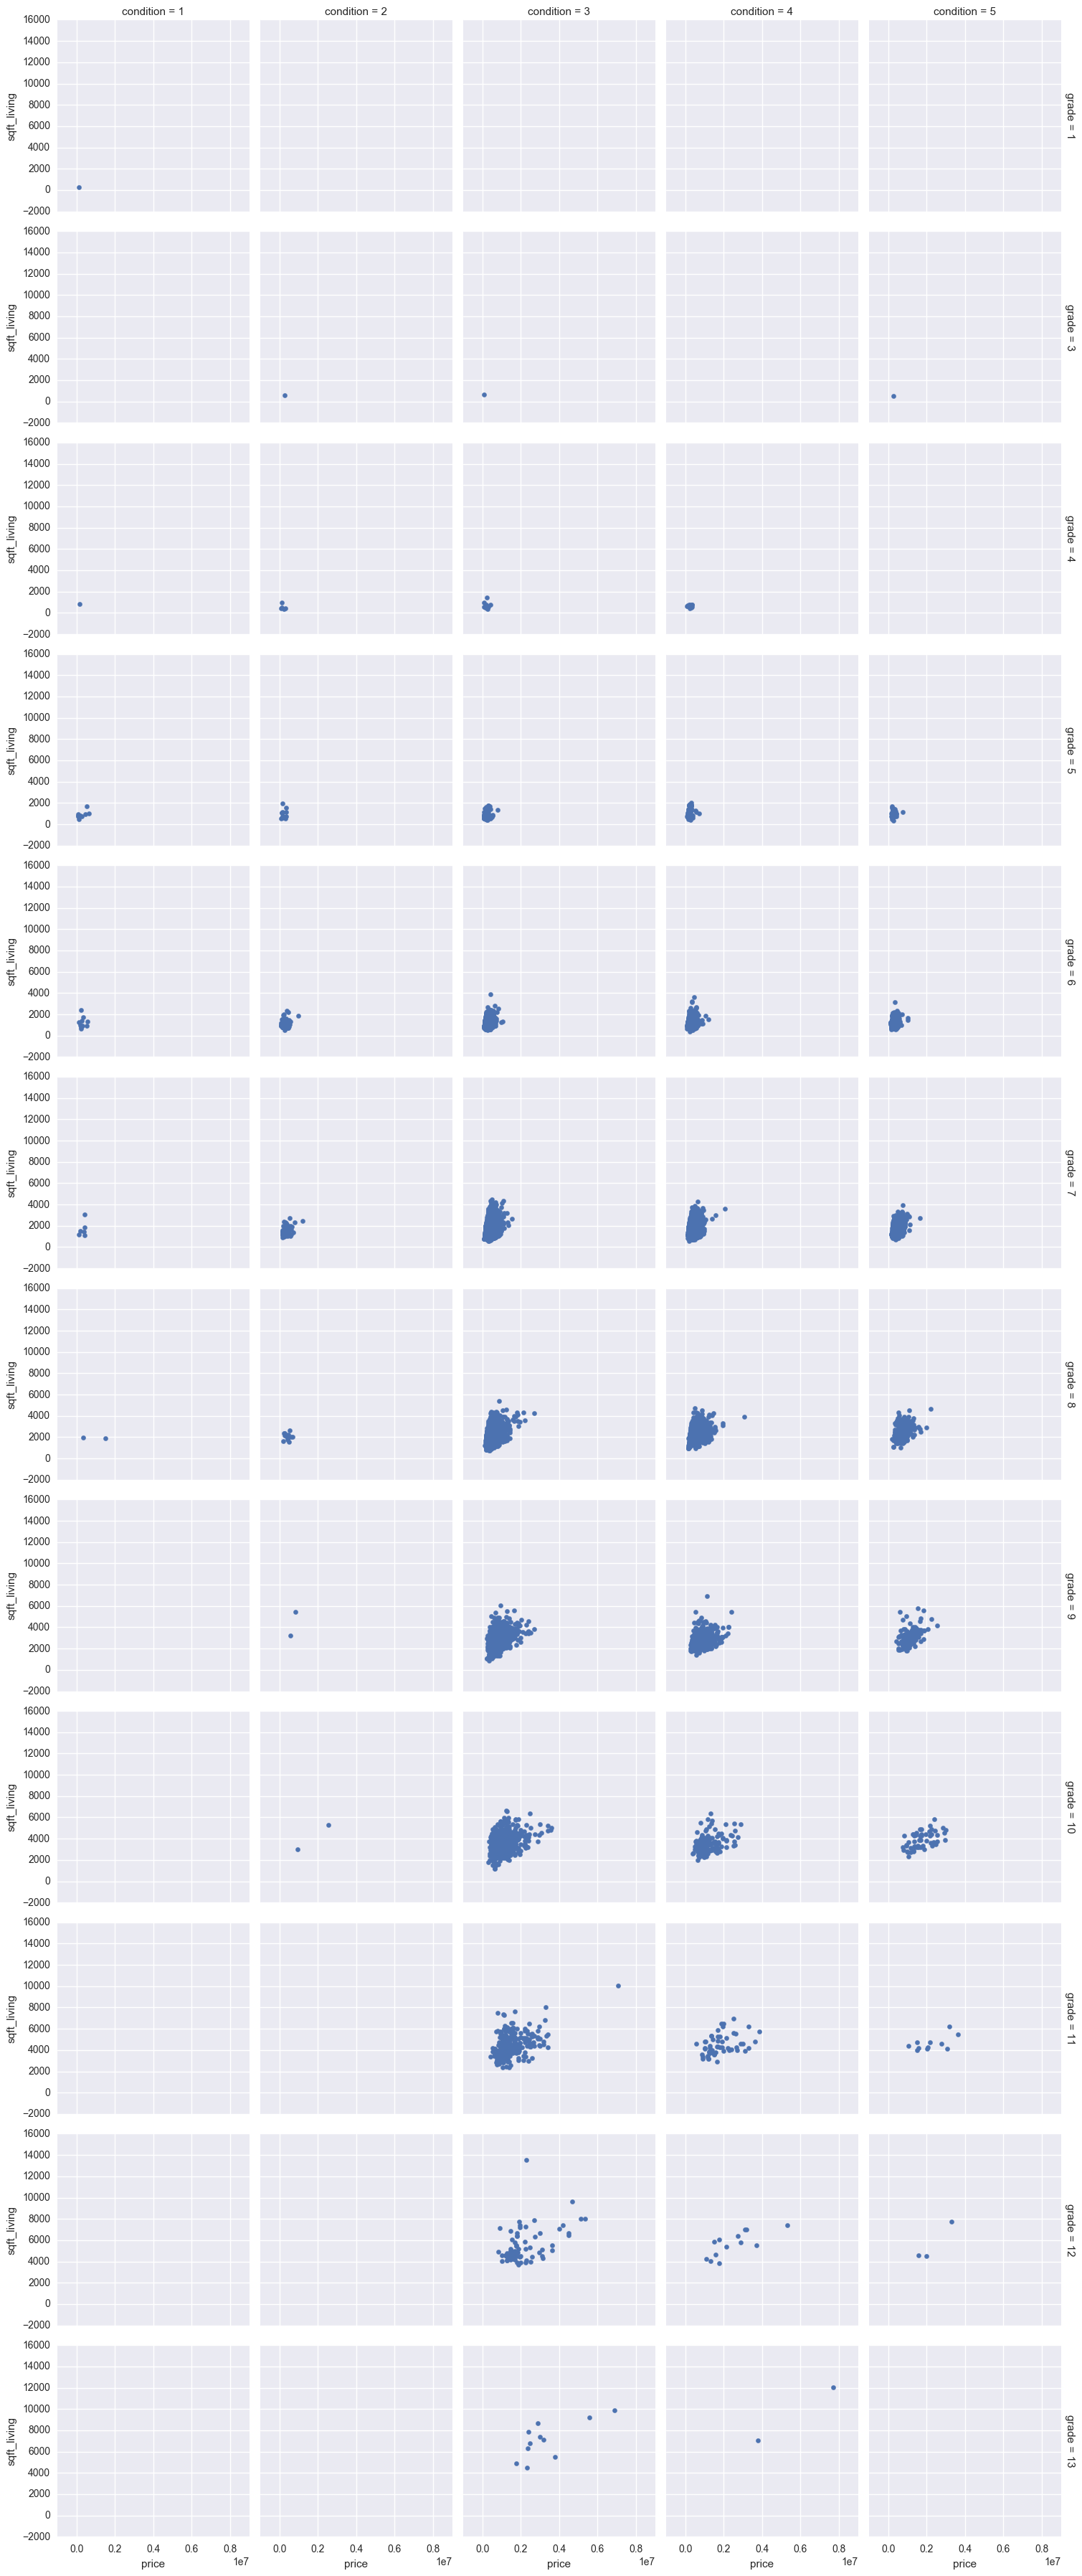

In [14]:
# Scatter Plot - Visualizar e comparar a relação entre 2 variaveis 
g = sns.FacetGrid(dataset, col="condition", row="grade", margin_titles=True);
g.map(sns.plt.scatter, "price", "sqft_living");

O gráfico de dispersão é usado para verificar se existe relação de causa e efeito entre duas ou mais variáveis quantitativa. Isso não significa que uma variável afeta outra, mas determina se existe uma relação e qual a intensidade dessa relação entre elas.
<br> Dá pra notar que temos uma relação positiva a partir da condition = 3 e grade = 6, que se estende até a grade = 11, chegando na grade = 12 com pontos mais dispersos.
<br> Quanto maior a condition e a grade com relação ao metro² da casa, maior o seu preço.
<br> Conseguimos notar também aquele outlier do gráfico anterior, que possui uma condition = 3 e uma grade = 12.

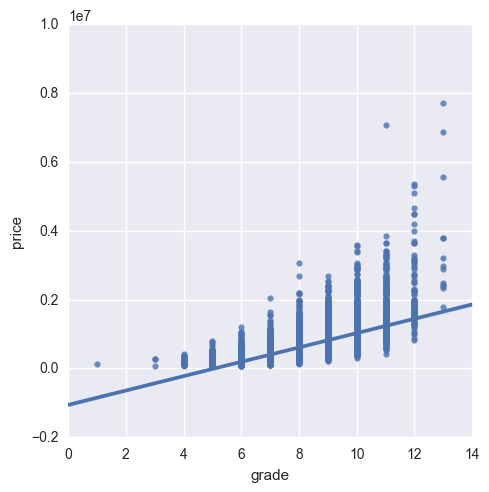

In [15]:
# Scatterplot com linha de regressão
g = sns.lmplot(x = 'grade', y = 'price', data = dataset);

Aqui conseguimos ver que quanto maior a nota maior o preço da casa

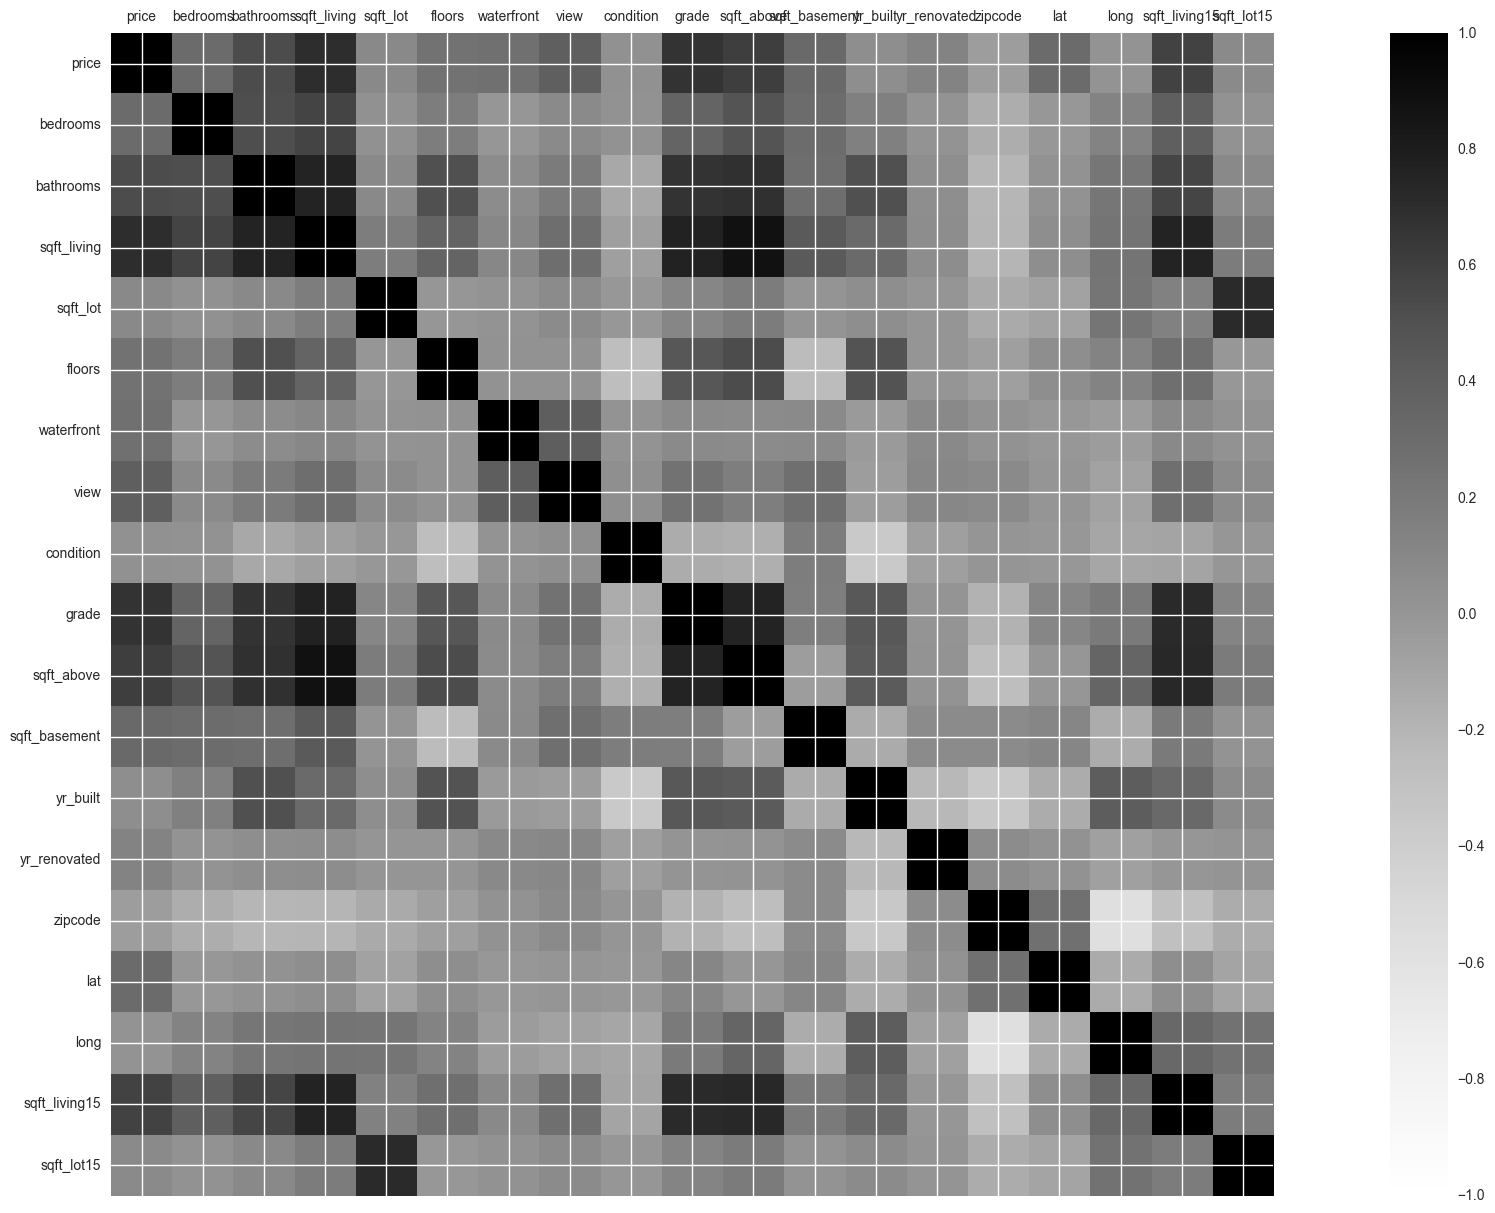

In [16]:
# Matriz de Correlação com nomes das variáveis
correlations = dataset.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 19, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
fig.set_size_inches(30, 15)
plt.show()

Podemos ver que existe uma correlação alta entre algumas variáveis, por exemplo sqft_living(Metro² da casa) com sqft_above(Metro² da casa, sem contar o porão), que subtraindo uma da outra indica se a casa possui ou não porão.
<br><br>Outra observação interessante é que a nota tem uma correlação acima da média com as metragem das casas e a quatidade de banheiros.
<br><br>Já o preço é determinado muito provavelmente pela metragem da casa (sqft_living e sqft_living15), nota (grade), metragem sem contar o porão (sqft_above), banheiros (bathrooms) e quartos (bedrooms)

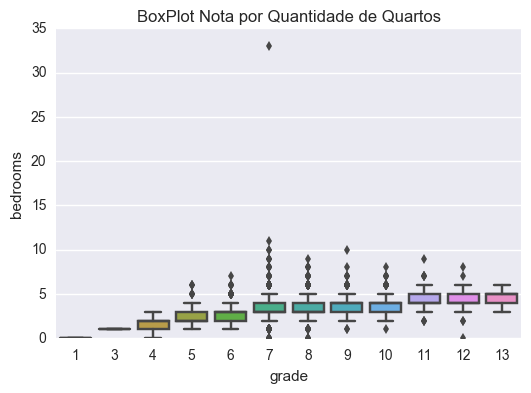

In [17]:
# Boxplot
ax = sns.boxplot(x = 'grade', y = 'bedrooms', data = dataset) ;
ax.set_title("BoxPlot Nota por Quantidade de Quartos");

Os dados apresentam uma pequena variabilidade.

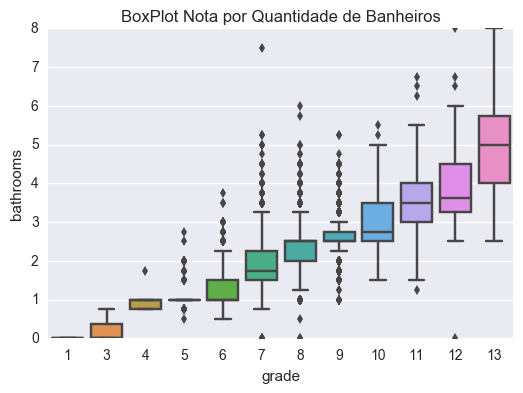

In [18]:
# Boxplot
ax1 = sns.boxplot(x = 'grade', y = 'bathrooms', data = dataset);
ax1.set_title("BoxPlot Nota por Quantidade de Banheiros");

Já nesse BoxPlot é possível ver que a amplitude é maior, ou seja, existe uma maior variedade dos dados.
Alem disso, a nota apresenta niveis médios diferentes para a quantidade de banheiros.
<br><br>
Fica claro que a nota da casa é muito mais influenciada pela quantidade de banheiros, do que pela quantidade de quartos, pois a amplitude dos dados é muito maior quando comparado a quantidade de banheiros pela nota das casas.


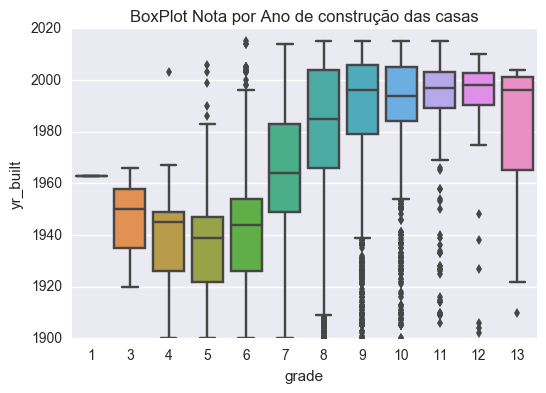

In [19]:
# Boxplot
ax2 = sns.boxplot(x = 'grade', y = 'yr_built', data = dataset) ;
ax2.set_title("BoxPlot Nota por Ano de construção das casas");

Aqui já possível ver uma amplitude muito maior, principalmente a partir da nota 5. Os niveis médios tambem estão distintos e como a mediana está mais próxima de Q3 os dados estão levemente negativamente assimétricos, constatando assim que o ano de contrução da casa não influência na sua nota.

## Divisão dos Datasets

Vamos fazer um teste para verificar a acurácia do modelo antes de fazer as devidas preparações nos dados.

In [20]:
# Divisão dos datasets de treino e de teste
array = dataset.values

# Separando o array em componentes de input e output
X = array[:,1:18]
Y = array[:,0]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reporduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = cross_validation.train_test_split(X, Y, 
                                                                         test_size = teste_size,
                                                                        random_state = seed)

# Shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(14480, 17) (7133, 17) (14480,) (7133,)


In [21]:
# Criando o modelo
modelo = LinearRegression()

# Criando o modelo
modelo.fit(X_treino, Y_treino)

# Score
result = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 68.282%


Tivemos uma acuracia de 68% sem nem fazer a preparação dos dados! :o

Vamos tentar melhorar!

## Preparando os Dados

### Escala

In [22]:
# Colocar os dados na mesma escala

# Gerando a nova escala
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print(rescaledX[0:2,:])

[[ 0.09090909  0.125       0.06716981  0.00310751  0.          0.          0.
   0.5         0.5         0.09758772  0.          0.47826087  0.
   0.89393939  0.57149751  0.21760797  0.16193426]
 [ 0.09090909  0.28125     0.17207547  0.00407187  0.4         0.          0.
   0.5         0.5         0.20614035  0.08298755  0.44347826  0.98808933
   0.62626263  0.90895931  0.16611296  0.22216486]]


### Padronização

In [23]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão) - Preço
# É útil quando queremos comparar dados que correspondem a unidades diferentes. 
# No nosso caso, queremos deseja remover as unidades. 
# Para isso se transforma os dados de forma que a variância seja unitária e que a média da série seja 0.

# Gerando o novo padrão
scaler = StandardScaler().fit_transform(dataset['price'][:,np.newaxis]);
#standardX = scaler.transform(X)

# Sumarizando os dados transformados
print(scaler[0:5,:])

[[-0.86671733]
 [-0.00568792]
 [-0.98084935]
 [ 0.17409044]
 [-0.08195753]]


### Normalização

Vamos normalizar o price e o sqft_living

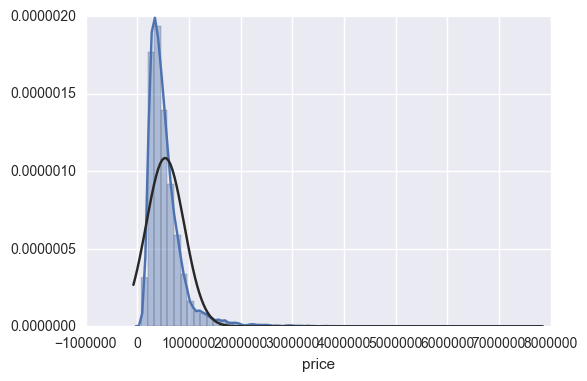

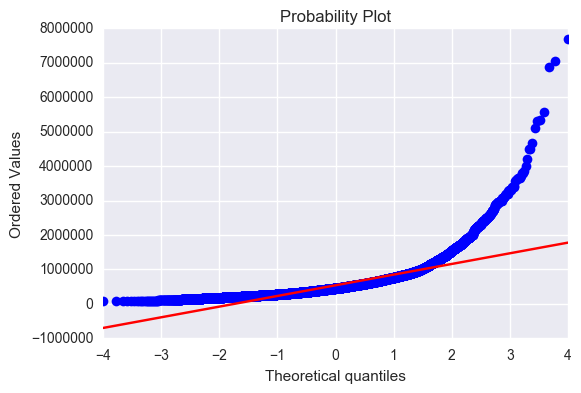

In [24]:
# Histograma e gráfico de probabilidade normal - usados para avaliar a não normalidade dos dados.
sns.distplot(dataset.price, fit=norm, bins=60, kde=True);
fig = plt.figure()
res = stats.probplot(dataset.price, plot=plt)

Podemos ver que os dados de preço são inclidados para a direita e não seguem uma distribuição normal.
<br> Uma forma de consertar isso é aplicando a tranformação em log  para uma curva de distribuição normal.

In [25]:
# Aplicando log transformation
dataset.price = np.log(dataset.price)

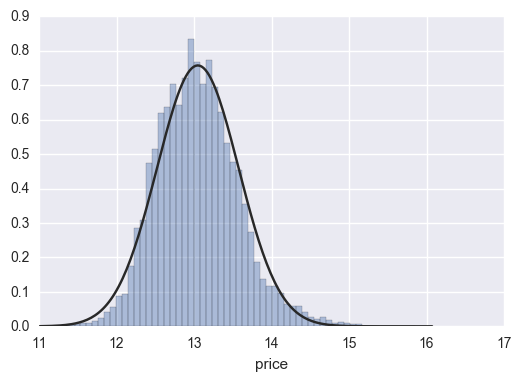

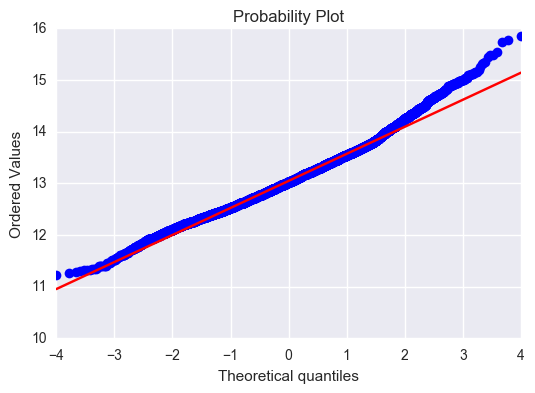

In [26]:
# Após a tranformação
sns.distplot(dataset.price, fit=norm, bins=60, kde=False);
fig = plt.figure()
res = stats.probplot(dataset.price, plot=plt)

Agora sim os dados estao simétricos e seguem uma curva de distribuição normal.

Agora para sqft_living

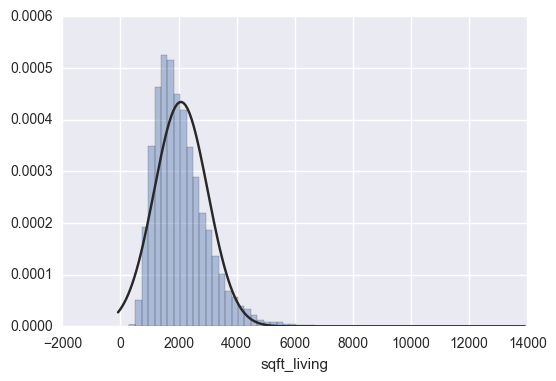

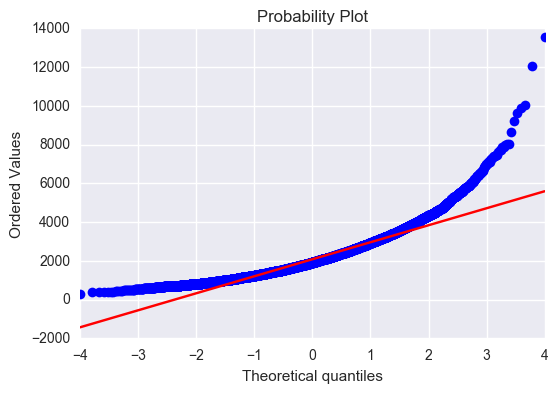

In [27]:
# Histograma e gráfico de probabilidade normal
sns.distplot(dataset.sqft_living, fit=norm, bins=60, kde=False);
fig = plt.figure()
res = stats.probplot(dataset.sqft_living, plot=plt)

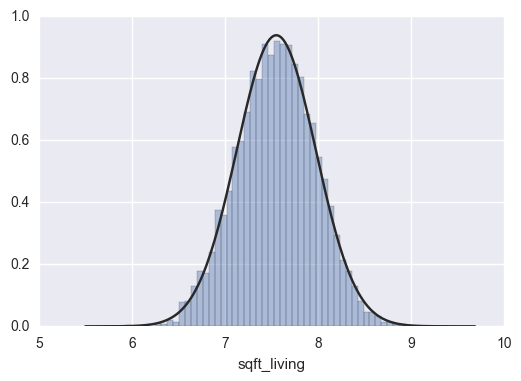

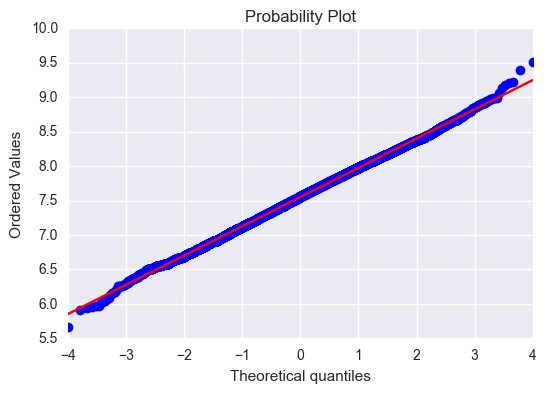

In [28]:
# Log transformation
dataset.sqft_living = np.log(dataset.sqft_living)

# Após a tranformação
sns.distplot(dataset.sqft_living, fit=norm, bins=60, kde=False);
fig = plt.figure()
res = stats.probplot(dataset.sqft_living, plot=plt)

## Divisão dos Datasets

In [29]:
# Divisão dos datasets de treino e de teste
array = dataset.values

# Separando o array em componentes de input e output
X = array[:,1:18]
Y = array[:,0]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reporduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = cross_validation.train_test_split(X, Y, 
                                                                         test_size = teste_size,
                                                                        random_state = seed)
# Shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(14480, 17) (7133, 17) (14480,) (7133,)


In [30]:
# Criando o modelo
modelo = LinearRegression()

# Criando o modelo
modelo.fit(X_treino, Y_treino)

# Score
result = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 76.954%


Agora a acurácia do modelo subiu para 76.9%.<br>
Vamos ver se algum outro modelo apresenta uma melhor performace.

## Seleção do Modelo Preditivo

In [31]:
dataset.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,7.073270,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,13.195614,3,2.25,7.851661,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,12.100712,2,1.00,6.646391,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


LM: 76.954% 
RR: 76.956% 
LS: 53.837% 
ENR: 54.289% 
KNN: 51.179% 
CART: 77.520% 


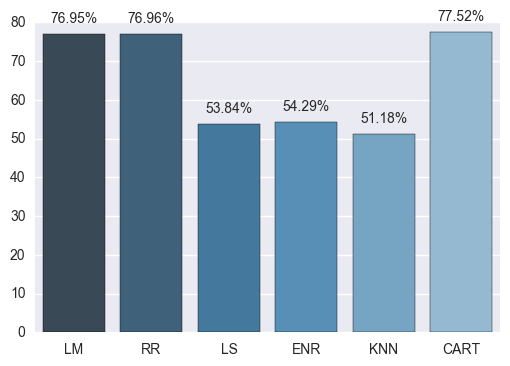

In [32]:
seed = 7

# Preparando os modelo
modelos = []
modelos.append(('LM', LinearRegression()))
modelos.append(('RR', Ridge()))
modelos.append(('LS', Lasso()))
modelos.append(('ENR', ElasticNet()))
modelos.append(('KNN', KNeighborsRegressor()))
modelos.append(('CART', DecisionTreeRegressor()))
#modelos.append(('SVM', SVR()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    modelo.fit(X_treino, Y_treino) 
    cv_results = modelo.score(X_teste, Y_teste) 
    resultados.append(cv_results*100)
    nomes.append(nome)
    msg = "%s: %.3f%% " % (nome, cv_results*100)
    print(msg)

bp = sns.barplot(x=nomes, y=resultados, palette="Blues_d")
for p in bp.patches:
    height = p.get_height()
    bp.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height),
            ha="center") 

CART foi qual obteve o melhor resultado, com 77.52% de acurácia.

Acurácia: 77.754%
MSE: 0.06
Score de variação: 0.78


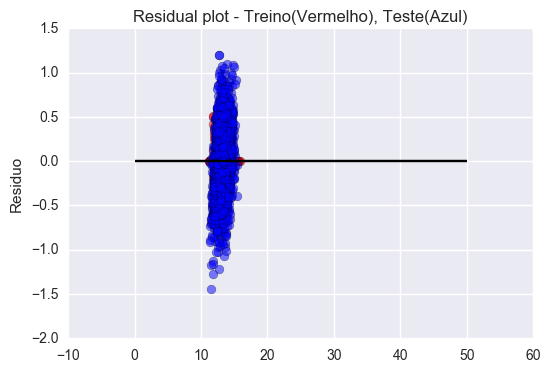

In [33]:
# Criando o modelo
modelo = DecisionTreeRegressor()

# Criando o modelo
modelo.fit(X_treino, Y_treino)

# Score
result = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

# MSE (Mean Square Error) - A diferença entre o estimador e o que é previsto.
print('MSE: %.2f' % np.mean((modelo.predict(X_teste) - Y_teste) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % modelo.score(X_teste, Y_teste))

# Prevendo o preço da casa
modelo.predict(X_teste)

# Comparando preços originais x preços previstos
plt.scatter(modelo.predict(X_treino), modelo.predict(X_treino) - Y_treino, c = 'r', s = 40, alpha = 0.5)
plt.scatter(modelo.predict(X_teste), modelo.predict(X_teste) - Y_teste, c = 'b', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel('Residuo')
plt.title("Residual plot - Treino(Vermelho), Teste(Azul)")
plt.show()

## Salvando o resultado do  trabalho

In [34]:
# Salvando o modelo
arquivo = 'modelo_CART_v1.sav'
pickle.dump(modelo, open(arquivo, 'wb'))

# Carregando o arquivo
modelo_CART_v1 = pickle.load(open(arquivo, 'rb'))
resultado = modelo_CART_v1.score(X_teste, Y_teste)

# Print do resultado
print(resultado * 100)

77.7535562199
